
Diabetes Prediction Using Machine Learning

In [17]:
#import numpy, pandas 

import pandas as pd
import numpy as np

# import SelectFromModel, train_test_split, DecisionTreeClassifier, StandardScaler

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


# import RandomForestClassifier, roc_auc_score, StandardScaler, make_pipeline, KFold, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold


from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Note: just have a look what all libraries you have imported

In [18]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Exploratory Data Analysis (EDA)

Now let’ see that what are columns available in our dataset.

In [19]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now let’s check that if our dataset have null values or not

In [22]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values but that is actually not a true story as in this particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset. Hence we will first replace the 0 value with the NAN value then start the imputation process.

In [23]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
# showing count of nans
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


As mentioned above that now we will be replacing the zeros with the NAN values so that we can impute it later to maintain the authenticity of the dataset as well as trying to have a better Imputation approach i.e to apply mean values of each column to the null values of the respective columns.

Data Visualization

Plotting the data distribution plots before removing null values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19eae41640>,
      dtype=object)

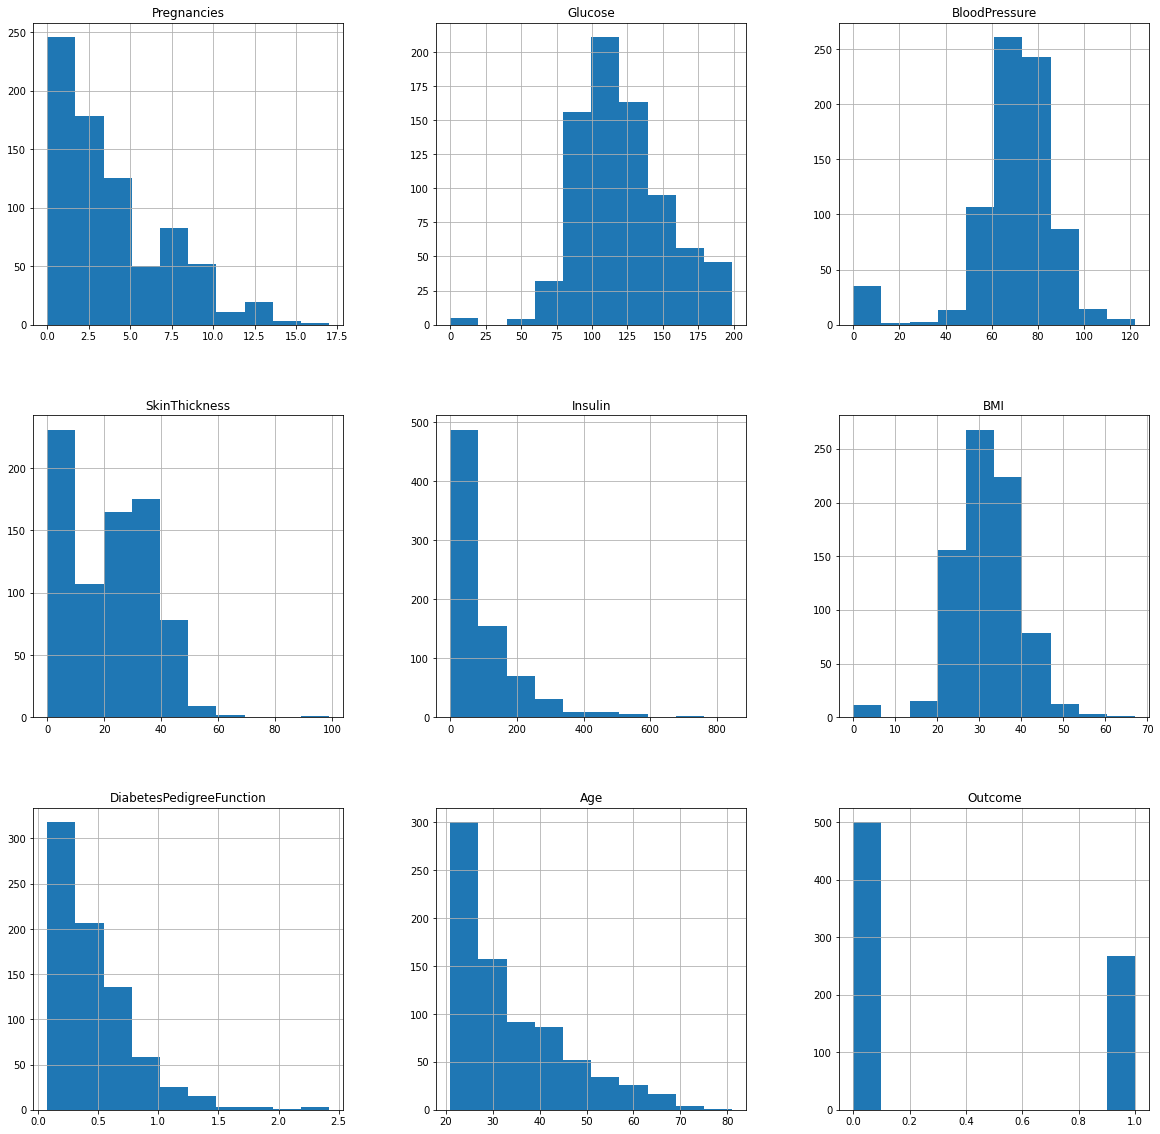

In [24]:
diabetes_df.hist(figsize = (20,20))

why do we need to see the distribution of data?
 So the answer is simple it is the best way to start the analysis of the dataset as it shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.

Now we will be imputing the mean value of the column to each missing value of that particular column

In [25]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

Plotting the distributions after removing the NAN values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19eaa0e910>,
      dtype=object)

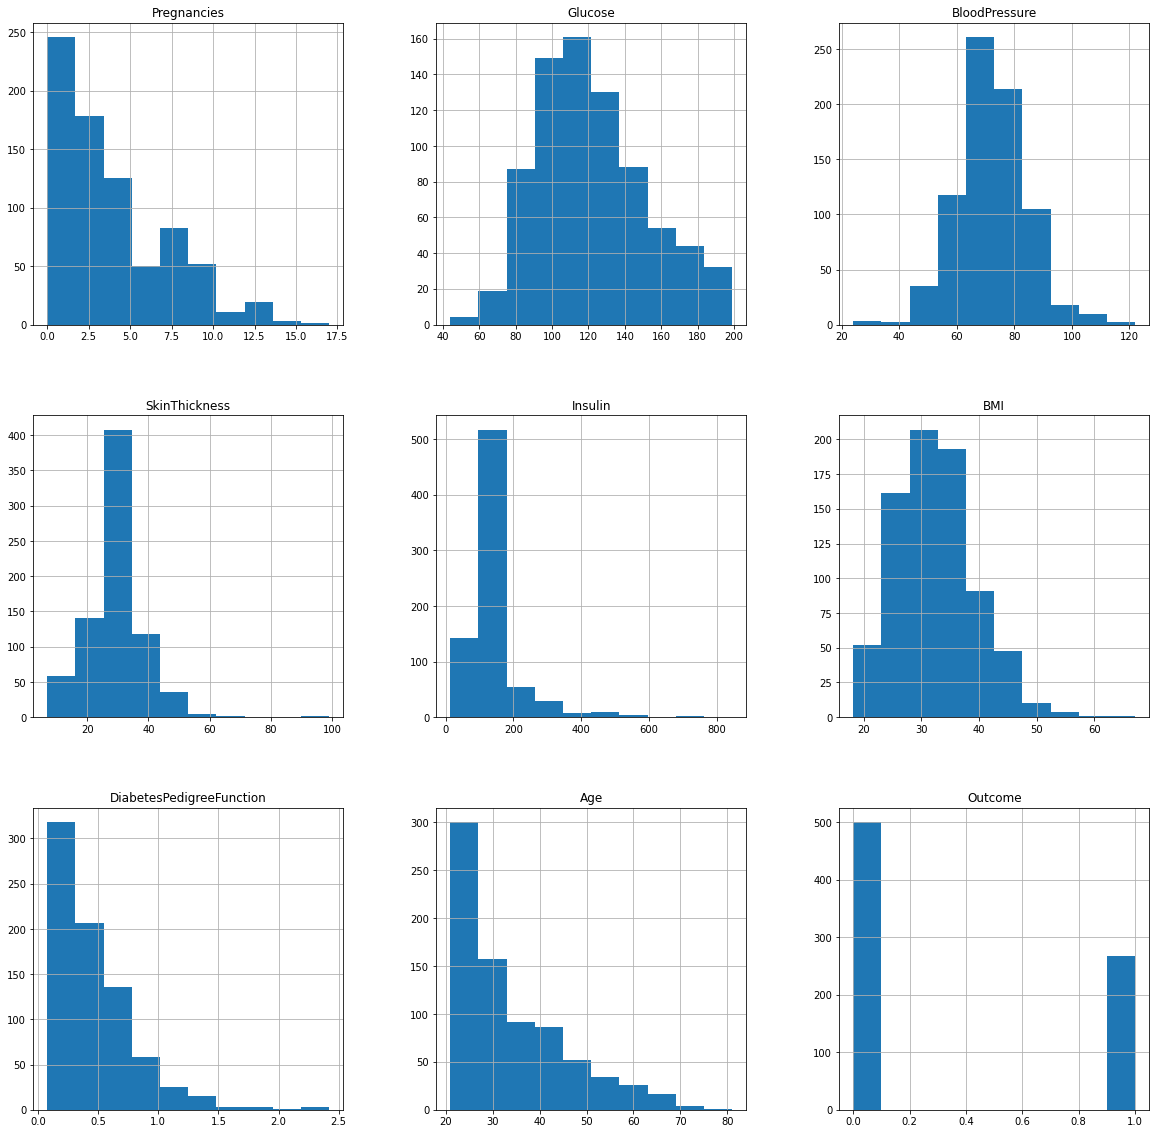

In [26]:
diabetes_df_copy.hist(figsize = (20,20))

In age column after removal of the null values, we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

Plotting Null Count Analysis Plot

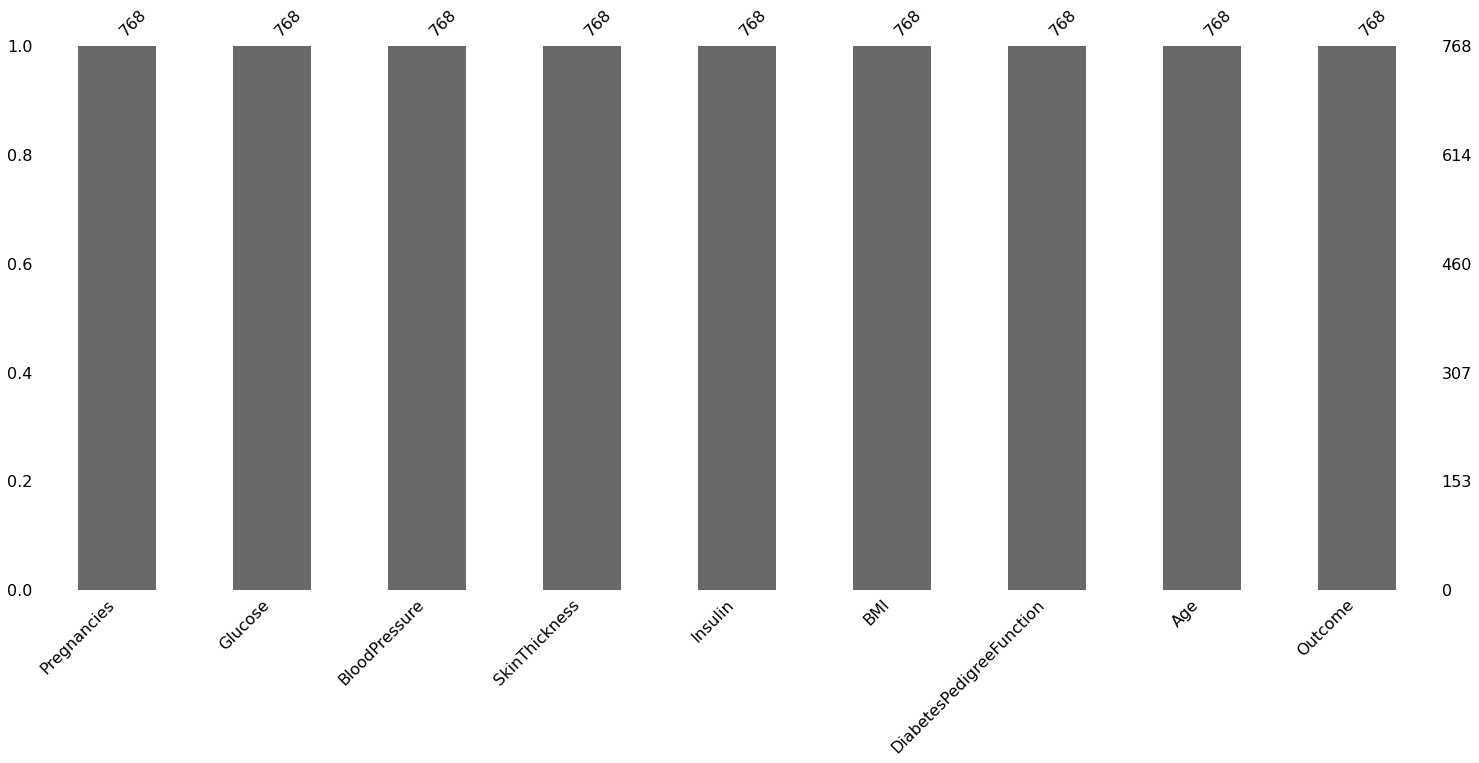

In [28]:
import missingno as msno
msno.bar(diabetes_df)

Inference: Now in the above graph also we can clearly see that there are no null values in the dataset.

Now, let’s check that how well our outcome column is balanced

0    500
1    268
Name: Outcome, dtype: int64


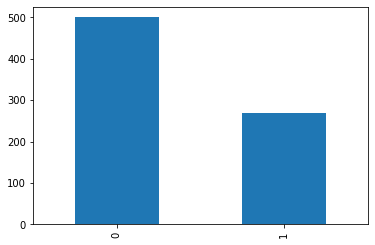

In [29]:
print(diabetes_df.Outcome.value_counts())
diabetes_df.Outcome.value_counts().plot(kind="bar")

Inference: Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

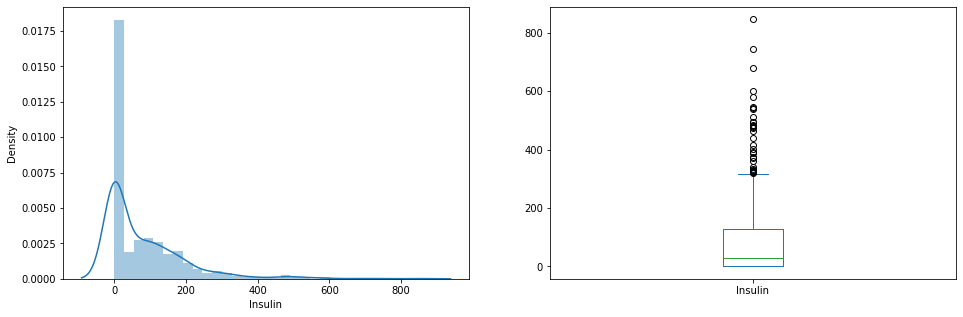

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

Inference: That’s how Distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column and other information too which can be derived by the box and whiskers plot.

Correlation between all the features

Correlation between all the features before cleaning

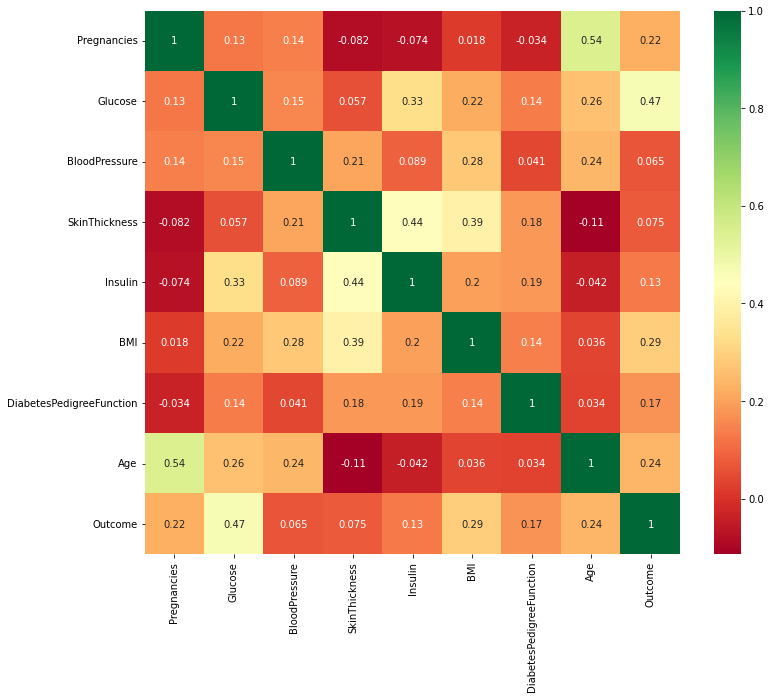

In [33]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

# Scaling the Data

Before scaling down the data let’s have a look into it

In [34]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


After Standard scaling

In [35]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


That’s how our dataset will be looking like when it is scaled down or we can see every value now is on the same scale which will help our ML model to give a better result.

Let’s explore our target column

In [36]:
y = diabetes_df_copy.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Model Building
Splitting the dataset

In [37]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

Now we will split the data into training and testing data using the train_test_split function

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

# Random Forest
Building the model using RandomForest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

Now after building the model let’s check the accuracy of the model on the training dataset.

In [40]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


So here we can see that on the training dataset our model is overfitted.

Getting the accuracy score for Random Forest

In [41]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7637795275590551


Classification report and confusion matrix of random forest model

In [44]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[134  28]
 [ 32  60]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       162
           1       0.68      0.65      0.67        92

    accuracy                           0.76       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.76      0.76      0.76       254



# Decision Tree
Building the model using DecisionTree

In [45]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Now we will be making the predictions on the testing data directly as it is of more importance.

Getting the accuracy score for Decision Tree

In [46]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7086614173228346


In [47]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[127  35]
 [ 39  53]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       162
           1       0.60      0.58      0.59        92

    accuracy                           0.71       254
   macro avg       0.68      0.68      0.68       254
weighted avg       0.71      0.71      0.71       254



# XgBoost classifier
Building model using XGBoost

In [48]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier()

Now we will be making the predictions on the testing data directly as it is of more importance.

Getting the accuracy score for the XgBoost classifier

In [49]:
from sklearn import metrics

xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7795275590551181


In [50]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[136  26]
 [ 30  62]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       162
           1       0.70      0.67      0.69        92

    accuracy                           0.78       254
   macro avg       0.76      0.76      0.76       254
weighted avg       0.78      0.78      0.78       254



Support Vector Machine (SVM)
Building the model using Support Vector Machine (SVM)

In [51]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Prediction from support vector machine model on the testing data

In [52]:
svc_pred = svc_model.predict(X_test)

Accuracy score for SVM

In [53]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7480314960629921


Classification report and confusion matrix of the SVM classifier

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[145  17]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



# The Conclusion from Model Building
Therefore Random forest is the best model for this prediction since it has an accuracy_score of 0.76.
# Feature Importance
Knowing about the feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

Getting feature importances

In [55]:
rfc.feature_importances_

array([0.07764794, 0.25767941, 0.08790468, 0.07036657, 0.07226764,
       0.1642211 , 0.12978935, 0.1401233 ])

From the above output, it is not much clear that which feature is important for that reason we will now make a visualization of the same.

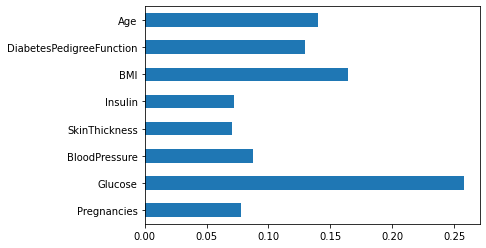

In [56]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

Here from the above graph, it is clearly visible that Glucose as a feature is the most important in this dataset

# Saving Model – Random Forest

In [57]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1])

Now for the last time, I’ll be looking at the head and tail of the dataset so that we can take any random set of features from both the head and tail of the data to test that if our model is good enough to give the right prediction.

In [58]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Putting data points in the model will either return 0 or 1 i.e. person suffering from diabetes or not.



In [60]:
rfc.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([1])

In [61]:
rfc.predict([[10,101,76,48,180,32.9,0.171,63]])  # 763 th patient

array([0])

# Conclusion
After using all these patient records, we are able to build a machine learning model (random forest – best one) to accurately predict whether or not the patients in the dataset have diabetes or not along with that we were able to draw some insights from the data via data analysis and visualization.